<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


CoolingLevel: 86.22222222222217
FanSpeed: 86.22222222222217


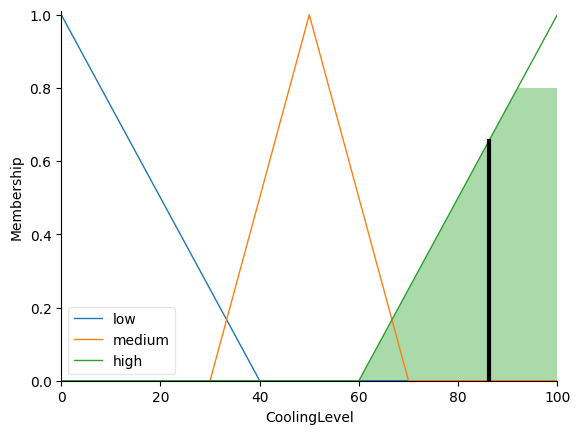

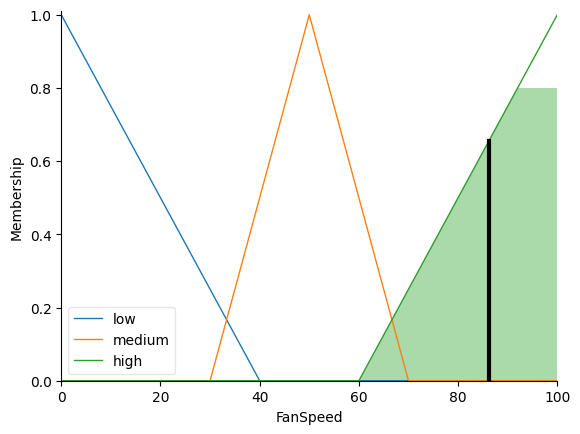

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'Temperature')
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
Occupancy = ctrl.Antecedent(np.arange(0, 21, 1), 'Occupancy')

FanSpeed = ctrl.Consequent(np.arange(0, 101, 1), 'FanSpeed')
CoolingLevel = ctrl.Consequent(np.arange(0, 101, 1), 'CoolingLevel')

Temperature['cold'] = fuzz.trimf(Temperature.universe, [10, 10, 18])
Temperature['cool'] = fuzz.trimf(Temperature.universe, [16, 20, 24])
Temperature['comfortable'] = fuzz.trimf(Temperature.universe, [22, 25, 26])
Temperature['warm'] = fuzz.trimf(Temperature.universe, [25, 28, 32])
Temperature['hot'] = fuzz.trimf(Temperature.universe, [30, 35, 40])

Humidity['low'] = fuzz.trimf(Humidity.universe, [0, 0, 40])
Humidity['medium'] = fuzz.trimf(Humidity.universe, [30, 50, 70])
Humidity['high'] = fuzz.trimf(Humidity.universe, [60, 100, 100])

Occupancy['few'] = fuzz.trimf(Occupancy.universe, [0, 0, 5])
Occupancy['moderate'] = fuzz.trimf(Occupancy.universe, [3, 7, 12])
Occupancy['many'] = fuzz.trimf(Occupancy.universe, [10, 20, 20])

FanSpeed['low'] = fuzz.trimf(FanSpeed.universe, [0, 0, 40])
FanSpeed['medium'] = fuzz.trimf(FanSpeed.universe, [30, 50, 70])
FanSpeed['high'] = fuzz.trimf(FanSpeed.universe, [60, 100, 100])

CoolingLevel['low'] = fuzz.trimf(CoolingLevel.universe, [0, 0, 40])
CoolingLevel['medium'] = fuzz.trimf(CoolingLevel.universe, [30, 50, 70])
CoolingLevel['high'] = fuzz.trimf(CoolingLevel.universe, [60, 100, 100])

rules = [
    ctrl.Rule(Temperature['cold'], FanSpeed['low']),
    ctrl.Rule(Temperature['cool'], FanSpeed['low']),
    ctrl.Rule(Temperature['comfortable'], FanSpeed['medium']),
    ctrl.Rule(Temperature['warm'], FanSpeed['high']),
    ctrl.Rule(Temperature['hot'], FanSpeed['high']),
    ctrl.Rule(Temperature['cold'], CoolingLevel['low']),
    ctrl.Rule(Temperature['cool'], CoolingLevel['low']),
    ctrl.Rule(Temperature['comfortable'], CoolingLevel['medium']),
    ctrl.Rule(Temperature['warm'], CoolingLevel['high']),
    ctrl.Rule(Temperature['hot'], CoolingLevel['high']),
    ctrl.Rule(Humidity['low'], CoolingLevel['low']),
    ctrl.Rule(Humidity['medium'], CoolingLevel['medium']),
    ctrl.Rule(Humidity['high'], CoolingLevel['high']),
    ctrl.Rule(Occupancy['few'], FanSpeed['low']),
    ctrl.Rule(Occupancy['moderate'], FanSpeed['medium']),
    ctrl.Rule(Occupancy['many'], FanSpeed['high']),
    ctrl.Rule(Temperature['hot'] & Humidity['high'] & Occupancy['many'], CoolingLevel['high']),
    ctrl.Rule(Temperature['hot'] & Humidity['high'] & Occupancy['many'], FanSpeed['high']),
    ctrl.Rule(Temperature['comfortable'] & Humidity['medium'] & Occupancy['moderate'], CoolingLevel['medium']),
    ctrl.Rule(Temperature['comfortable'] & Humidity['medium'] & Occupancy['moderate'], FanSpeed['medium']),
    ctrl.Rule(Temperature['cool'] & Humidity['low'] & Occupancy['few'], CoolingLevel['low']),
    ctrl.Rule(Temperature['cool'] & Humidity['low'] & Occupancy['few'], FanSpeed['low']),
]

control_sys = ctrl.ControlSystem(rules)
AC_sys = ctrl.ControlSystemSimulation(control_sys)

AC_sys.input['Temperature'] = 36
AC_sys.input['Humidity'] = 90
AC_sys.input['Occupancy'] = 12

AC_sys.compute()

print('CoolingLevel:', AC_sys.output['CoolingLevel'])
print('FanSpeed:', AC_sys.output['FanSpeed'])
CoolingLevel.view(sim=AC_sys)
FanSpeed.view(sim=AC_sys)

CoolingLevel: 49.99999999999999
FanSpeed: 49.99999999999999


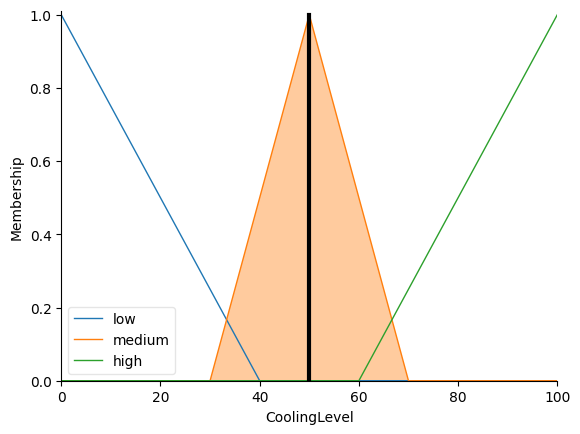

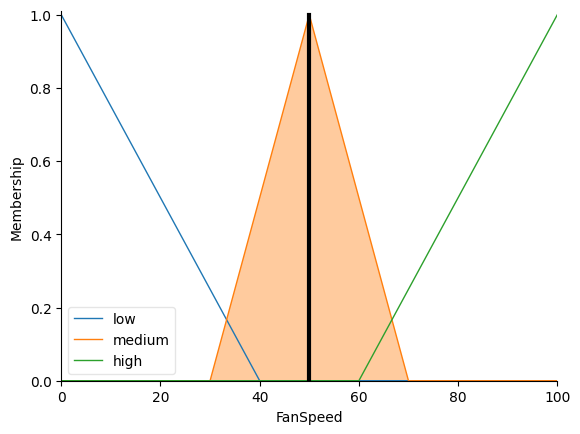

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'Temperature')
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
Occupancy = ctrl.Antecedent(np.arange(0, 21, 1), 'Occupancy')

FanSpeed = ctrl.Consequent(np.arange(0, 101, 1), 'FanSpeed')
CoolingLevel = ctrl.Consequent(np.arange(0, 101, 1), 'CoolingLevel')

Temperature['cold'] = fuzz.trimf(Temperature.universe, [10, 10, 18])
Temperature['cool'] = fuzz.trimf(Temperature.universe, [16, 20, 24])
Temperature['comfortable'] = fuzz.trimf(Temperature.universe, [22, 25, 26])
Temperature['warm'] = fuzz.trimf(Temperature.universe, [25, 28, 32])
Temperature['hot'] = fuzz.trimf(Temperature.universe, [30, 35, 40])

Humidity['low'] = fuzz.trimf(Humidity.universe, [0, 0, 40])
Humidity['medium'] = fuzz.trimf(Humidity.universe, [30, 50, 70])
Humidity['high'] = fuzz.trimf(Humidity.universe, [60, 100, 100])

Occupancy['few'] = fuzz.trimf(Occupancy.universe, [0, 0, 5])
Occupancy['moderate'] = fuzz.trimf(Occupancy.universe, [3, 7, 12])
Occupancy['many'] = fuzz.trimf(Occupancy.universe, [10, 20, 20])

FanSpeed['low'] = fuzz.trimf(FanSpeed.universe, [0, 0, 40])
FanSpeed['medium'] = fuzz.trimf(FanSpeed.universe, [30, 50, 70])
FanSpeed['high'] = fuzz.trimf(FanSpeed.universe, [60, 100, 100])

CoolingLevel['low'] = fuzz.trimf(CoolingLevel.universe, [0, 0, 40])
CoolingLevel['medium'] = fuzz.trimf(CoolingLevel.universe, [30, 50, 70])
CoolingLevel['high'] = fuzz.trimf(CoolingLevel.universe, [60, 100, 100])

rules = [
    ctrl.Rule(Temperature['cold'], FanSpeed['low']),
    ctrl.Rule(Temperature['cool'], FanSpeed['low']),
    ctrl.Rule(Temperature['comfortable'], FanSpeed['medium']),
    ctrl.Rule(Temperature['warm'], FanSpeed['high']),
    ctrl.Rule(Temperature['hot'], FanSpeed['high']),
    ctrl.Rule(Temperature['cold'], CoolingLevel['low']),
    ctrl.Rule(Temperature['cool'], CoolingLevel['low']),
    ctrl.Rule(Temperature['comfortable'], CoolingLevel['medium']),
    ctrl.Rule(Temperature['warm'], CoolingLevel['high']),
    ctrl.Rule(Temperature['hot'], CoolingLevel['high']),
    ctrl.Rule(Humidity['low'], CoolingLevel['low']),
    ctrl.Rule(Humidity['medium'], CoolingLevel['medium']),
    ctrl.Rule(Humidity['high'], CoolingLevel['high']),
    ctrl.Rule(Occupancy['few'], FanSpeed['low']),
    ctrl.Rule(Occupancy['moderate'], FanSpeed['medium']),
    ctrl.Rule(Occupancy['many'], FanSpeed['high']),
    ctrl.Rule(Temperature['hot'] & Humidity['high'] & Occupancy['many'], CoolingLevel['high']),
    ctrl.Rule(Temperature['hot'] & Humidity['high'] & Occupancy['many'], FanSpeed['high']),
    ctrl.Rule(Temperature['comfortable'] & Humidity['medium'] & Occupancy['moderate'], CoolingLevel['medium']),
    ctrl.Rule(Temperature['comfortable'] & Humidity['medium'] & Occupancy['moderate'], FanSpeed['medium']),
    ctrl.Rule(Temperature['cool'] & Humidity['low'] & Occupancy['few'], CoolingLevel['low']),
    ctrl.Rule(Temperature['cool'] & Humidity['low'] & Occupancy['few'], FanSpeed['low']),
]

control_sys = ctrl.ControlSystem(rules)
AC_sys = ctrl.ControlSystemSimulation(control_sys)

AC_sys.input['Temperature'] = 25
AC_sys.input['Humidity'] = 50
AC_sys.input['Occupancy'] = 5

AC_sys.compute()

print('CoolingLevel:', AC_sys.output['CoolingLevel'])
print('FanSpeed:', AC_sys.output['FanSpeed'])
CoolingLevel.view(sim=AC_sys)
FanSpeed.view(sim=AC_sys)